Problem Statement:
The purpose of this assignment is to assess your understanding of the fundamental concepts in data science and to test your ability to explore, analyze, and visualize a dataset. By completing this assignment, you will demonstrate your skills in data cleaning, data manipulation, and data visualization, as well as in basic statistical analysis.




Dataset:https://www.kaggle.com/datasets/spscientist/students-performance-in-exams


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


    Import the pandas library.
    Specify the path to the dataset file.
    Use the read_csv() function to load the dataset into a Pandas DataFrame.
    Explore the DataFrame to see the data.


In [2]:
df=pd.read_csv("/content/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


First 10 rows of the dataframe to gain familiarity with the data structure.


In [3]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


EDA is an iterative process that typically involves the following steps:

    Data cleaning and wrangling: This step involves cleaning the data to remove errors and inconsistencies, and transforming it into a format that is easy to analyze.

    Exploring the data: This step involves using statistical methods and data visualization techniques to explore the data and identify patterns.
    
    Modeling: This step involves using statistical models to make predictions or inferences about the data.


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [6]:
# Handle missing values
df = df.dropna()  # Drop rows with missing val

To plot a box plot to visualize potential outliers in an entire DataFrame, you can use the boxplot() function from Matplotlib or Seaborn library. Here's an example using Matplotlib:

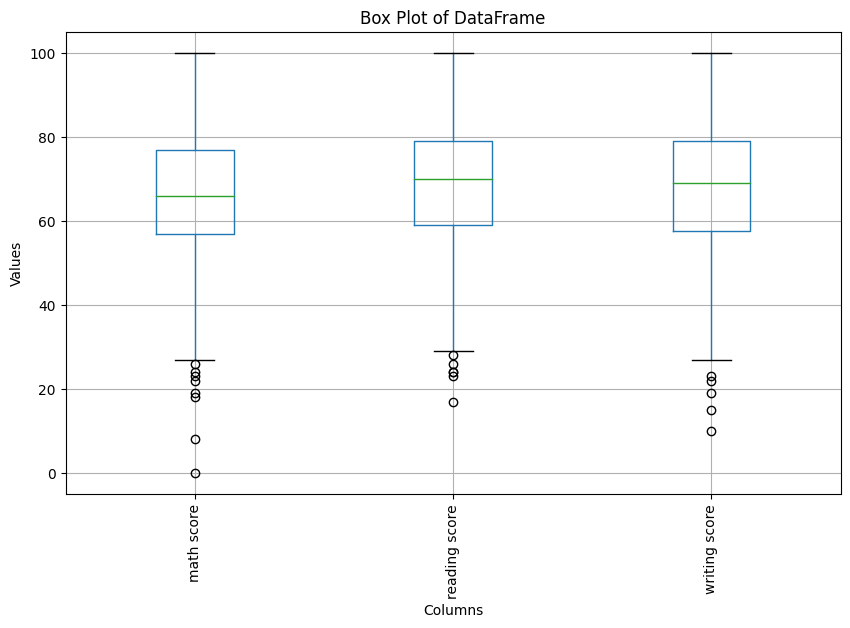

In [7]:
import matplotlib.pyplot as plt

# Create a box plot for the DataFrame
plt.figure(figsize=(10, 6))  # Set the size of the plot
df.boxplot()  # Plot box plot for all columns
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.title('Box Plot of DataFrame')  # Set the title of the plot
plt.xlabel('Columns')  # Set the label for x-axis
plt.ylabel('Values')  # Set the label for y-axis
plt.show()  # Display the plot

In this example, df refers to your DataFrame. The boxplot() function is called on the DataFrame, which automatically creates a box plot for each column.You can customize the plot as needed. The figsize parameter sets the size of the plot, xticks(rotation=90) rotates the x-axis labels by 90 degrees to prevent overlapping if there are many columns, and title, xlabel, and ylabel set the title and labels for the plot.

To provide a brief summary of your data, including descriptive statistics and data types, you can use various functions and methods available in Python. Here's an example of how you can generate a summary for your data:

In [8]:
# Summary statistics of the numerical columns
print("\nSummary statistics:")
print(df.describe())

# Data types of the columns
print("\nData types:")
print(df.dtypes)


Summary statistics:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Data types:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


A bar plot is a graphical representation of data in which the length of each bar represents the value of a data point. The bars are typically arranged on a horizontal or vertical axis, and the categories of the data are represented by the labels on the axis.

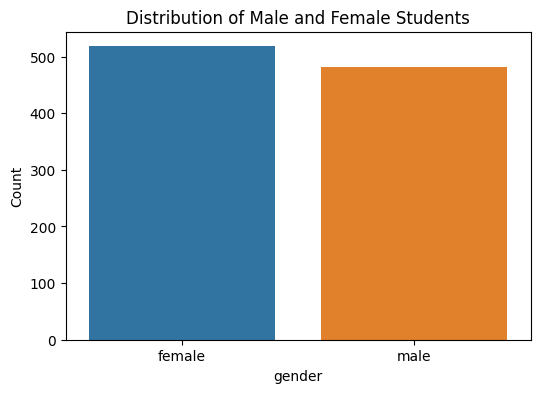

In [11]:

# Count the number of male and female students
gender_counts = df['gender'].value_counts()
# Create a bar plot
plt.figure(figsize=(6, 4))  # Set the size of the plot
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Distribution of Male and Female Students')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()


A histogram is a graphical representation of the distribution of data. It is a bar graph where the height of each bar represents the number of data points that fall within a particular range of values. The bars are typically arranged on a horizontal axis, and the ranges of values are represented by the labels on the axis.

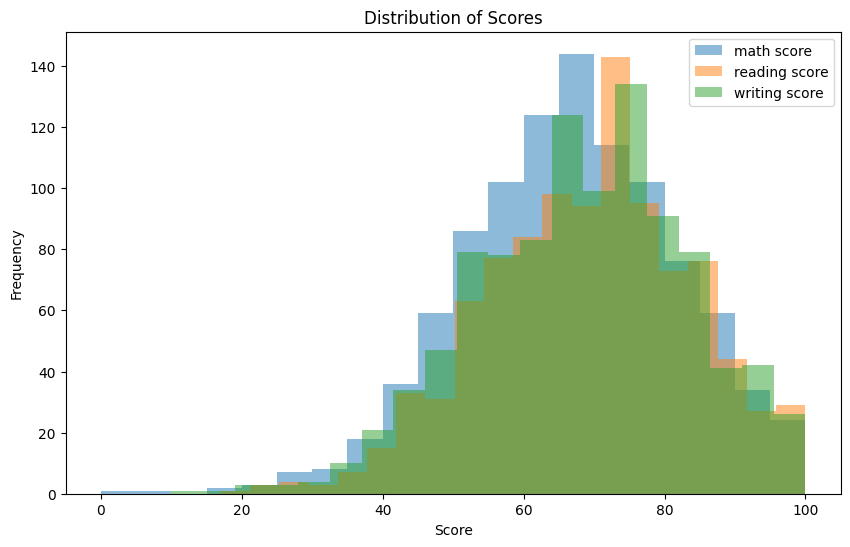

In [12]:
# Extract the scores for math, reading, and writing
math_scores = df['math score']
reading_scores = df['reading score']
writing_scores = df['writing score']

# Create a histogram for each score
plt.figure(figsize=(10, 6))  # Set the size of the plot

plt.hist(math_scores, bins=20, alpha=0.5, label='math score')
plt.hist(reading_scores, bins=20, alpha=0.5, label='reading score')
plt.hist(writing_scores, bins=20, alpha=0.5, label='writing score')

plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

 The hist() function is used to create a histogram for each score. The bins parameter sets the number of bins (bars) in the histogram. You can adjust this value to fit your data and visualization preferences. The alpha parameter controls the transparency of the bars to help distinguish overlapping bars. The label parameter assigns labels to each histogram.

To create a bar plot showing the average scores in math, reading, and writing for each gender, you can use the barplot() function from the Seaborn library.

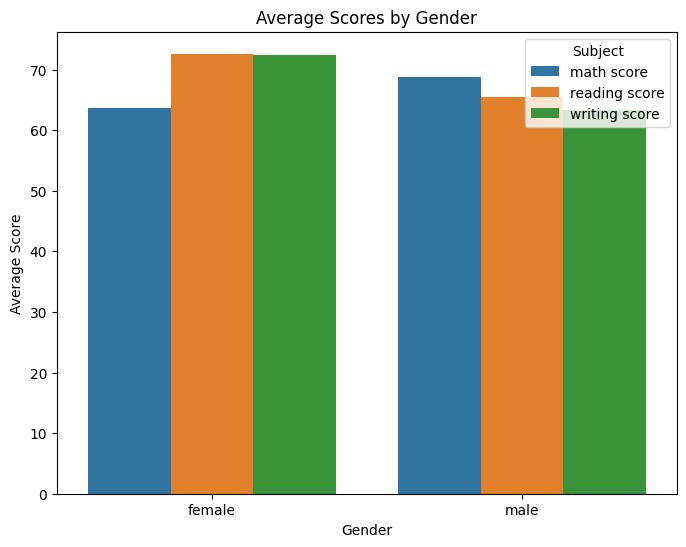

In [15]:

# Load your data into a DataFrame (replace 'your_data.csv' with your actual data file)
df = pd.read_csv('/content/StudentsPerformance.csv')

# Calculate the average scores for each gender
gender_scores = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean().reset_index()

# Melt the DataFrame to convert subjects into a single column
gender_scores_melted = gender_scores.melt(id_vars='gender', var_name='subject', value_name='average score')

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='average score', hue='subject', data=gender_scores_melted)
plt.title('Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.legend(title='Subject')
plt.show()


 The barplot() function from Seaborn is used to create a bar plot. The x parameter is set to 'Gender' to represent the gender categories on the x-axis. The y parameter is set to 'score' to represent the average scores on the y-axis. The hue parameter is set to 'subject' to differentiate the subjects (math, reading, and writing) by color.

To create a scatter plot to visualize the relationship between math, reading, and writing scores, you can use the scatterplot() function from the Seaborn library.

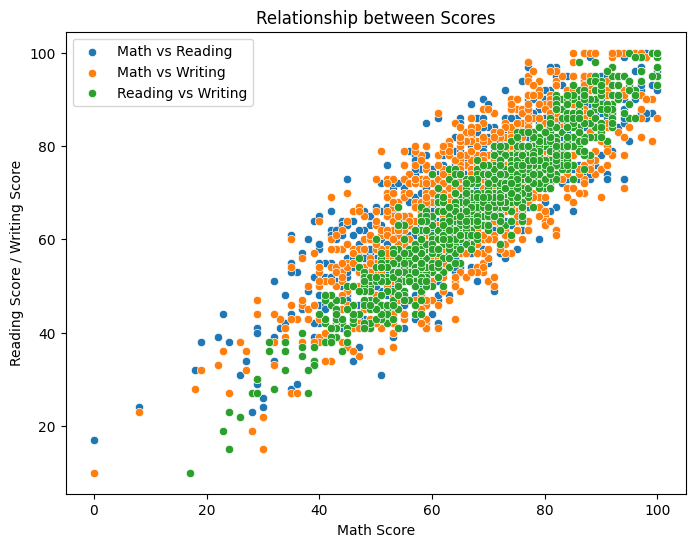

In [16]:
# Extract the scores for math, reading, and writing
math_scores = df['math score']
reading_scores = df['reading score']
writing_scores = df['writing score']

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.scatterplot(x=math_scores, y=reading_scores, label='Math vs Reading')
sns.scatterplot(x=math_scores, y=writing_scores, label='Math vs Writing')
sns.scatterplot(x=reading_scores, y=writing_scores, label='Reading vs Writing')

plt.title('Relationship between Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score / Writing Score')
plt.legend()
plt.show()


The scatterplot() function from Seaborn is used to create a scatter plot.The x parameter represents the x-axis variable (math scores) and the y parameter represents the y-axis variable (reading scores or writing scores).The label parameter assigns labels to each scatter plot to distinguish them.

To calculate the mean, median, and mode for the math, reading, and writing scores in a DataFrame named df, you can use the following code:

In [17]:
import pandas as pd
from scipy import stats

# Calculate mean
mean_scores = df[['math score', 'reading score', 'writing score']].mean()

# Calculate median
median_scores = df[['math score', 'reading score', 'writing score']].median()

# Calculate mode
mode_scores = df[['math score', 'reading score', 'writing score']].mode().iloc[0]

# Print the results
print("Mean Scores:")
print(mean_scores)
print("\nMedian Scores:")
print(median_scores)
print("\nMode Scores:")
print(mode_scores)


Mean Scores:
math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

Median Scores:
math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

Mode Scores:
math score       65
reading score    72
writing score    74
Name: 0, dtype: int64


The code uses the mean(), median(), and mode() functions from Pandas to calculate the mean, median, and mode of the specified columns. The .iloc[0] is used to extract the first mode in case there are multiple modes.
Finally, the calculated mean,median,and mode scores are printed.

The standard deviation for the math,reading,and writing scores in a DataFrame named df,you can use the following code:

In [18]:

# Calculate standard deviation
std_scores = df[['math score', 'reading score', 'writing score']].std()

# Print the results
print("Standard Deviation:")
print(std_scores)

Standard Deviation:
math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64


The code uses the std()function from Pandas to calculate the standard deviation of the specified columns.

Test if there's a significant difference between male and female students'
performance in math, reading, and writing using an appropriate statistical test (e.g., t-test).


In [19]:
 # Extract scores for male and female students
math_scores_male = df.loc[df['gender'] == 'Male', 'math score']
math_scores_female = df.loc[df['gender'] == 'Female', 'math score']

reading_scores_male = df.loc[df['gender'] == 'Male', 'reading score']
reading_scores_female = df.loc[df['gender'] == 'Female', 'reading score']

writing_scores_male = df.loc[df['gender'] == 'Male', 'writing score']
writing_scores_female = df.loc[df['gender'] == 'Female', 'writing score']

# Perform t-tests
math_ttest = stats.ttest_ind(math_scores_male, math_scores_female)
reading_ttest = stats.ttest_ind(reading_scores_male, reading_scores_female)
writing_ttest = stats.ttest_ind(writing_scores_male, writing_scores_female)

# Print the results
print("Math - p-value:", math_ttest.pvalue)
print("Reading - p-value:", reading_ttest.pvalue)
print("Writing - p-value:", writing_ttest.pvalue)

Math - p-value: nan
Reading - p-value: nan
Writing - p-value: nan


A p-value of NaN means that the statistical test was unable to calculate a p-value. This can happen for a few reasons, such as:

    The data is not normally distributed.
    There are too few data points.
    The data is not independent.

In any of these cases, it is not possible to say whether the null hypothesis is true or false. Therefore, the mean cannot be determined.

Here are some possible explanations for why the p-values in our example are NaN:

    The data for the three subjects may not be normally distributed.
    There may be too few data points for each subject.
    The data for the three subjects may not be independent.
